In [615]:
'''
Created on 2016. 9. 25

@author: dato
@desc: cnlp2 hw2 (NR method)
'''
#-*- coding: utf-8 -*-


'\nCreated on 2016. 9. 25\n\n@author: dato\n@desc: cnlp2 hw2 (NR method)\n'

# HW 02 - 1  Univariate Case

In [616]:
import numpy as np
from __future__ import division

In [617]:
def f(x): 
    return np.log( 4*np.exp(-1*x) + 2 ) + x/3

In [618]:
def g(x):
    return (np.exp(x) - 4) / ( 3*(np.exp(x) +2) )

In [619]:
def h(x):
    return (2*np.exp(x)) / pow( (np.exp(x) +2), 2)

In [620]:
x = f(0)
tol = 0.0001
max_loop = 10000

In [621]:
for index in xrange(max_loop):
    prev_x = x
    x = x - ( g(x) / h(x) )
    if ( abs(prev_x - x) ) < tol:
        break

In [622]:
print index
print x
print f(x)

3
1.38629436112
1.56071040904


# plot the graph

In [623]:
import matplotlib.pyplot as plt

In [624]:
data = []
scale = 10
for index in xrange(-2*scale, 10*scale, 1):
    data.append(f(index/scale) )

In [625]:
x_index =  [index/scale for index in xrange(-2*scale, 10*scale, 1)]

In [626]:
plt.plot(x_index, data)
plt.ylabel('f(x)')
plt.xlabel('x')

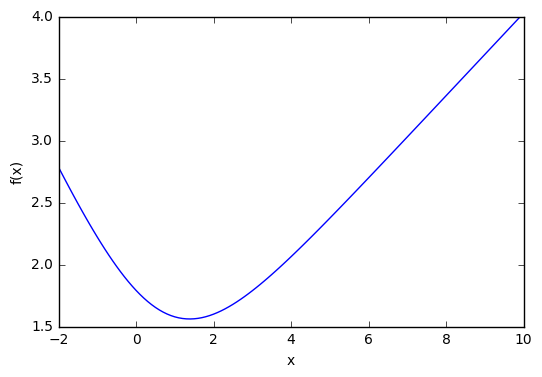

In [627]:
plt.show()

# HW 02 - 1  Multivariate Case

In [606]:
from numpy.linalg import pinv
from numpy.linalg import inv
from scipy.spatial import distance

In [607]:
def f(x):
    return np.log( np.exp(-x[0]) + 2*np.exp(-x[1]) +2 )  + x[0]/3 + x[1]/2

In [608]:
def g(x):
    dx = 1/3 - ( np.exp(-x[0]) ) / ( np.exp(-x[0]) + 2*np.exp(-x[1]) +2 )
    dy = 1/2 - ( 2*np.exp(-x[1]) ) / ( np.exp(-x[0]) + 2*np.exp(-x[1]) +2 )
    return np.asarray([dx, dy])    

In [609]:
def h(x):
    dxdx = 2*( np.exp(x[1])  +1 ) * np.exp( x[0] + x[1] ) / pow( ( 2*np.exp(x[0] + x[1]) + 2*np.exp(x[0]) + np.exp(x[1])  ), 2 )
    dxdy = -2*np.exp(x[0] + x[1] ) / pow( ( 2*np.exp(x[0] + x[1])  + 2*np.exp(x[0]) +np.exp(x[1]) ), 2 )
    dydx = -2*np.exp(x[0] + x[1] ) / pow( ( 2*np.exp(x[0] + x[1])  + 2*np.exp(x[0]) +np.exp(x[1]) ), 2 )
    dydy = 2*( np.exp(x[0])  +1 ) * np.exp( x[0] + x[1] ) / pow( ( 2*np.exp(x[0] + x[1]) + 2*np.exp(x[0]) + np.exp(x[1])  ), 2 )
    return np.asarray([[dxdx, dxdy], [dydx, dydy]])

In [610]:
x = np.asarray([0, 0])
tol = 0.0001
max_loop = 1000

In [611]:
for index in xrange(max_loop):
    
    prev_x = x
    x = x - np.dot( pinv(h(x)), g(x) )
    
    if ( distance.euclidean(prev_x, x) ) < tol:
        break   

In [614]:
index
print x
print f(x)

[-1.38630902 -1.09863183]
1.4735023851
